### Chapter 8: Template Matching

Your goal in this exercise is to write a function that takes in an image and a list of templates, and returns a list of the best fit location (bounding box) for each of the templates within the image. OpenCV provides you with the handy function `cv2.matchTemplate()` (documentation) to search the image, and `cv2.minMaxLoc()` (documentation) to extract the location of the best match.

You can choose between "squared difference" or "correlation" methods in using `cv2.matchTemplate()`, but keep in mind with squared differences you need to locate the global minimum difference to find a match, while for correlation, you're looking for a global maximum.

So, just to be clear, you goal here is to:

* Write a function that takes in an image and list of templates and returns a list of bounding boxes.
* Find that your function works well to locate the six example templates taken from the first image.
* Try your code on the second image, and find that template matching breaks easily.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

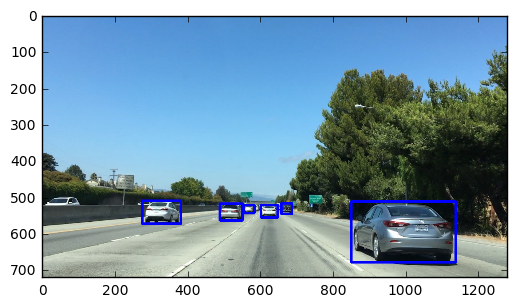

In [3]:
image = mpimg.imread('cutouts/bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')

templist = ['cutouts/cutout1.jpg', 'cutouts/cutout2.jpg', 'cutouts/cutout3.jpg',
            'cutouts/cutout4.jpg', 'cutouts/cutout5.jpg', 'cutouts/cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)

    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    # Define an empty list to take bbox coords
    bbox_list = []
    
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED

    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        #     using whichever of the OpenCV search methods you prefer
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine bounding box corners for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
            
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    # Return the list of bounding boxes
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()